Build a regression model to predict DefectCount using Temperature, Vibration,
Pressure, EnergyConsumption, ProductionUnits, plus encoded Plant and
MachineID. Report MAE and RMSE.

IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATA

In [2]:
df = pd.read_excel('C:/Users/sahan/OneDrive/Desktop/demo python code/MACHINE HEALTH & MAINTENANCE.xlsx')

In [3]:
df

,Timestamp,MachineID,Plant,Temperature,Vibration,Pressure,EnergyConsumption,ProductionUnits,DefectCount,MaintenanceFlag
0,2025-01-01 00:00:00,137,Plant_C,69.707421,3.937962,29.726777,254.562963,133,2,0
1,2025-01-01 01:00:00,143,Plant_C,68.929016,4.891410,33.855301,257.151463,155,2,0
2,2025-01-01 02:00:00,112,Plant_C,81.257229,5.399394,22.459834,274.710842,119,4,0
3,2025-01-01 03:00:00,108,Plant_A,86.751817,2.759409,36.211147,277.620583,120,2,0
4,2025-01-01 04:00:00,109,Plant_B,78.711891,6.594050,26.540506,199.763661,177,5,0
...,...,...,...,...,...,...,...,...,...,...
19995,2027-04-14 03:00:00,115,Plant_A,74.107527,5.381079,31.456000,294.013239,57,2,0
19996,2027-04-14 04:00:00,111,Plant_A,65.328735,6.964223,26.614313,231.190106,150,6,0
19997,2027-04-14 05:00:00,125,Plant_A,60.216298,3.429051,38.605298,270.326239,180,4,1
19998,2027-04-14 06:00:00,126,Plant_B,59.320378,3.575870,28.603057,257.354853,155,7,0


In [4]:
df.shape

(20000, 10)

In [5]:
df.head(10)

,Timestamp,MachineID,Plant,Temperature,Vibration,Pressure,EnergyConsumption,ProductionUnits,DefectCount,MaintenanceFlag
0,2025-01-01 00:00:00,137,Plant_C,69.707421,3.937962,29.726777,254.562963,133,2,0
1,2025-01-01 01:00:00,143,Plant_C,68.929016,4.891410,33.855301,257.151463,155,2,0
2,2025-01-01 02:00:00,112,Plant_C,81.257229,5.399394,22.459834,274.710842,119,4,0
3,2025-01-01 03:00:00,108,Plant_A,86.751817,2.759409,36.211147,277.620583,120,2,0
4,2025-01-01 04:00:00,109,Plant_B,78.711891,6.594050,26.540506,199.763661,177,5,0
5,2025-01-01 05:00:00,111,Plant_A,79.971603,6.601372,26.414432,361.042945,137,1,0
6,2025-01-01 06:00:00,105,Plant_C,63.038334,6.249361,31.194678,274.856607,72,5,0
7,2025-01-01 07:00:00,115,Plant_A,73.800556,6.210352,25.446779,180.040934,147,1,0
8,2025-01-01 08:00:00,100,Plant_A,62.263067,6.700815,27.546895,303.492256,84,0,0
9,2025-01-01 09:00:00,116,Plant_A,88.056272,5.621835,24.707210,242.941674,95,4,0


In [6]:
df.tail(10)

,Timestamp,MachineID,Plant,Temperature,Vibration,Pressure,EnergyConsumption,ProductionUnits,DefectCount,MaintenanceFlag
19990,2027-04-13 22:00:00,141,Plant_A,59.411221,5.843570,27.524402,324.988840,161,4,1
19991,2027-04-13 23:00:00,142,Plant_A,74.715725,3.646251,25.411506,283.036485,101,5,0
19992,2027-04-14 00:00:00,113,Plant_A,85.397394,3.779191,35.706477,281.542617,174,2,0
19993,2027-04-14 01:00:00,147,Plant_A,59.192416,3.063897,30.755165,268.403011,187,2,0
19994,2027-04-14 02:00:00,131,Plant_C,67.948767,5.138990,32.277354,254.817907,74,2,0
19995,2027-04-14 03:00:00,115,Plant_A,74.107527,5.381079,31.456000,294.013239,57,2,0
19996,2027-04-14 04:00:00,111,Plant_A,65.328735,6.964223,26.614313,231.190106,150,6,0
19997,2027-04-14 05:00:00,125,Plant_A,60.216298,3.429051,38.605298,270.326239,180,4,1
19998,2027-04-14 06:00:00,126,Plant_B,59.320378,3.575870,28.603057,257.354853,155,7,0
19999,2027-04-14 07:00:00,109,Plant_B,74.774554,4.406564,26.524951,208.046852,73,2,0


In [7]:
df.sample(10)

,Timestamp,MachineID,Plant,Temperature,Vibration,Pressure,EnergyConsumption,ProductionUnits,DefectCount,MaintenanceFlag
14350,2026-08-21 22:00:00,133,Plant_A,71.855641,6.347006,30.880410,295.196845,159,0,0
15538,2026-10-10 10:00:00,110,Plant_C,64.843573,3.930826,22.994786,219.423248,104,2,1
15984,2026-10-29 00:00:00,147,Plant_C,71.836142,3.717861,34.881497,319.740158,180,5,0
19046,2027-03-05 14:00:00,132,Plant_B,58.146139,4.828026,30.076323,230.354975,116,2,0
6766,2025-10-09 22:00:00,122,Plant_B,83.789648,6.540994,26.627276,191.218047,68,2,0
11954,2026-05-14 02:00:00,147,Plant_A,71.360068,4.874107,28.480138,229.690744,57,0,0
16068,2026-11-01 12:00:00,110,Plant_B,76.747665,2.488167,31.475622,276.664637,190,2,0
17275,2026-12-21 19:00:00,103,Plant_B,70.461935,3.864121,24.042951,208.669168,75,0,0
18074,2027-01-24 02:00:00,101,Plant_B,54.654809,5.916421,23.369489,183.716280,119,2,0
6601,2025-10-03 01:00:00,116,Plant_C,63.384122,4.811744,28.496471,236.743895,88,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          20000 non-null  datetime64[ns]
 1   MachineID          20000 non-null  int64         
 2   Plant              20000 non-null  object        
 3   Temperature        20000 non-null  float64       
 4   Vibration          20000 non-null  float64       
 5   Pressure           20000 non-null  float64       
 6   EnergyConsumption  20000 non-null  float64       
 7   ProductionUnits    20000 non-null  int64         
 8   DefectCount        20000 non-null  int64         
 9   MaintenanceFlag    20000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 1.5+ MB


In [9]:
df.dtypes

Timestamp            datetime64[ns]
MachineID                     int64
Plant                        object
Temperature                 float64
Vibration                   float64
Pressure                    float64
EnergyConsumption           float64
ProductionUnits               int64
DefectCount                   int64
MaintenanceFlag               int64
dtype: object

In [10]:
df.describe(include='all')

,Timestamp,MachineID,Plant,Temperature,Vibration,Pressure,EnergyConsumption,ProductionUnits,DefectCount,MaintenanceFlag
count,20000,20000.000000,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Plant_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2026-02-21 15:30:00,124.358750,NaN,69.947559,4.995461,29.993698,250.189198,124.649700,2.993550,0.101600
min,2025-01-01 00:00:00,100.000000,NaN,29.895390,-1.152912,6.456349,86.660670,50.000000,0.000000,0.000000
25%,2025-07-28 07:45:00,112.000000,NaN,63.236121,3.970814,26.626777,223.099989,87.000000,2.000000,0.000000
50%,2026-02-21 15:30:00,124.000000,NaN,69.940758,4.987013,30.013254,250.051619,125.000000,3.000000,0.000000
75%,2026-09-17 23:15:00,137.000000,NaN,76.664978,6.024795,33.391801,277.047594,162.000000,4.000000,0.000000
max,2027-04-14 07:00:00,149.000000,NaN,109.305828,11.558926,50.295742,426.441256,199.000000,13.000000,1.000000


In [11]:
df.columns=df.columns.str.lower()
df.columns

Index(['timestamp', 'machineid', 'plant', 'temperature', 'vibration',
       'pressure', 'energyconsumption', 'productionunits', 'defectcount',
       'maintenanceflag'],
      dtype='object')

HANDLING MISSING VALUES

In [12]:
df.isnull().sum()

timestamp            0
machineid            0
plant                0
temperature          0
vibration            0
pressure             0
energyconsumption    0
productionunits      0
defectcount          0
maintenanceflag      0
dtype: int64

In [13]:
df = df.isna().sum()

In [14]:
df.duplicated().sum()

np.int64(9)

In [15]:
initial_rows = len(df)
df = df.drop_duplicates(keep='first').reset_index(drop=True)
print(f"Removed {initial_rows - len(df)} duplicate rows")
print("Shape after removing duplicates:", df.shape)

Removed 9 duplicate rows
Shape after removing duplicates: (1,)


In [16]:
df.drop_duplicates()

0    0
dtype: int64

In [17]:
categorical_columns = ['plant', 'machineid']   # change these to your real names



In [19]:
categorical_columns = ['plant', 'machineid']  # your actual column names

for col in categorical_columns:
    if col in df.columns:
        print(f"\n{col} - number of unique values:", df[col].nunique())
        print(f"Top 10 values:\n{df[col].value_counts().head(10)}")
    else:
        print(f"Column '{col}' not found in df.columns")


plant - number of unique values: 3
Top 10 values:
plant
Plant_B    6822
Plant_A    6618
Plant_C    6560
Name: count, dtype: int64

machineid - number of unique values: 50
Top 10 values:
machineid
132    441
100    439
123    439
143    435
118    433
137    432
103    430
112    423
125    422
121    420
Name: count, dtype: int64


In [20]:
# Count missing per column
missing_count = df.isnull().sum()

# Percentage missing
missing_pct = (missing_count / len(df) * 100).round(2)

# Combine into a nice table
missing_report = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

print("Missing values report:")
print(missing_report[missing_report['Missing Count'] > 0])

print(f"\nTotal missing values in dataset: {missing_count.sum()}")
print(f"Total rows: {len(df)}")


Missing values report:
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

Total missing values in dataset: 0
Total rows: 20000


FEATURE HANDLING

In [21]:
num_features = ['temperature', 'vibration', 'pressure', 'energyconsumption', 'productionunits', 'defectcount']

print("\nNumerical features summary:\n", df[num_features].describe())

# For DefectCount specifically (target)
print("\nDefectCount details:")
print("Mean:", df['defectcount'].mean())
print("Median:", df['defectcount'].median())
print("Std Dev:", df['defectcount'].std())
print("Min/Max:", df['defectcount'].min(), "/", df['defectcount'].max())
print("Zeros %:", (df['defectcount'] == 0).mean() * 100)

cat_features = ['plant', 'machineid']


Numerical features summary:
         temperature     vibration      pressure  energyconsumption  \
count  20000.000000  20000.000000  20000.000000       20000.000000   
mean      69.947559      4.995461     29.993698         250.189198   
std        9.979693      1.502124      5.010768          39.969833   
min       29.895390     -1.152912      6.456349          86.660670   
25%       63.236121      3.970814     26.626777         223.099989   
50%       69.940758      4.987013     30.013254         250.051619   
75%       76.664978      6.024795     33.391801         277.047594   
max      109.305828     11.558926     50.295742         426.441256   

       productionunits   defectcount  
count     20000.000000  20000.000000  
mean        124.649700      2.993550  
std          43.445341      1.737458  
min          50.000000      0.000000  
25%          87.000000      2.000000  
50%         125.000000      3.000000  
75%         162.000000      4.000000  
max         199.000000     

EDA

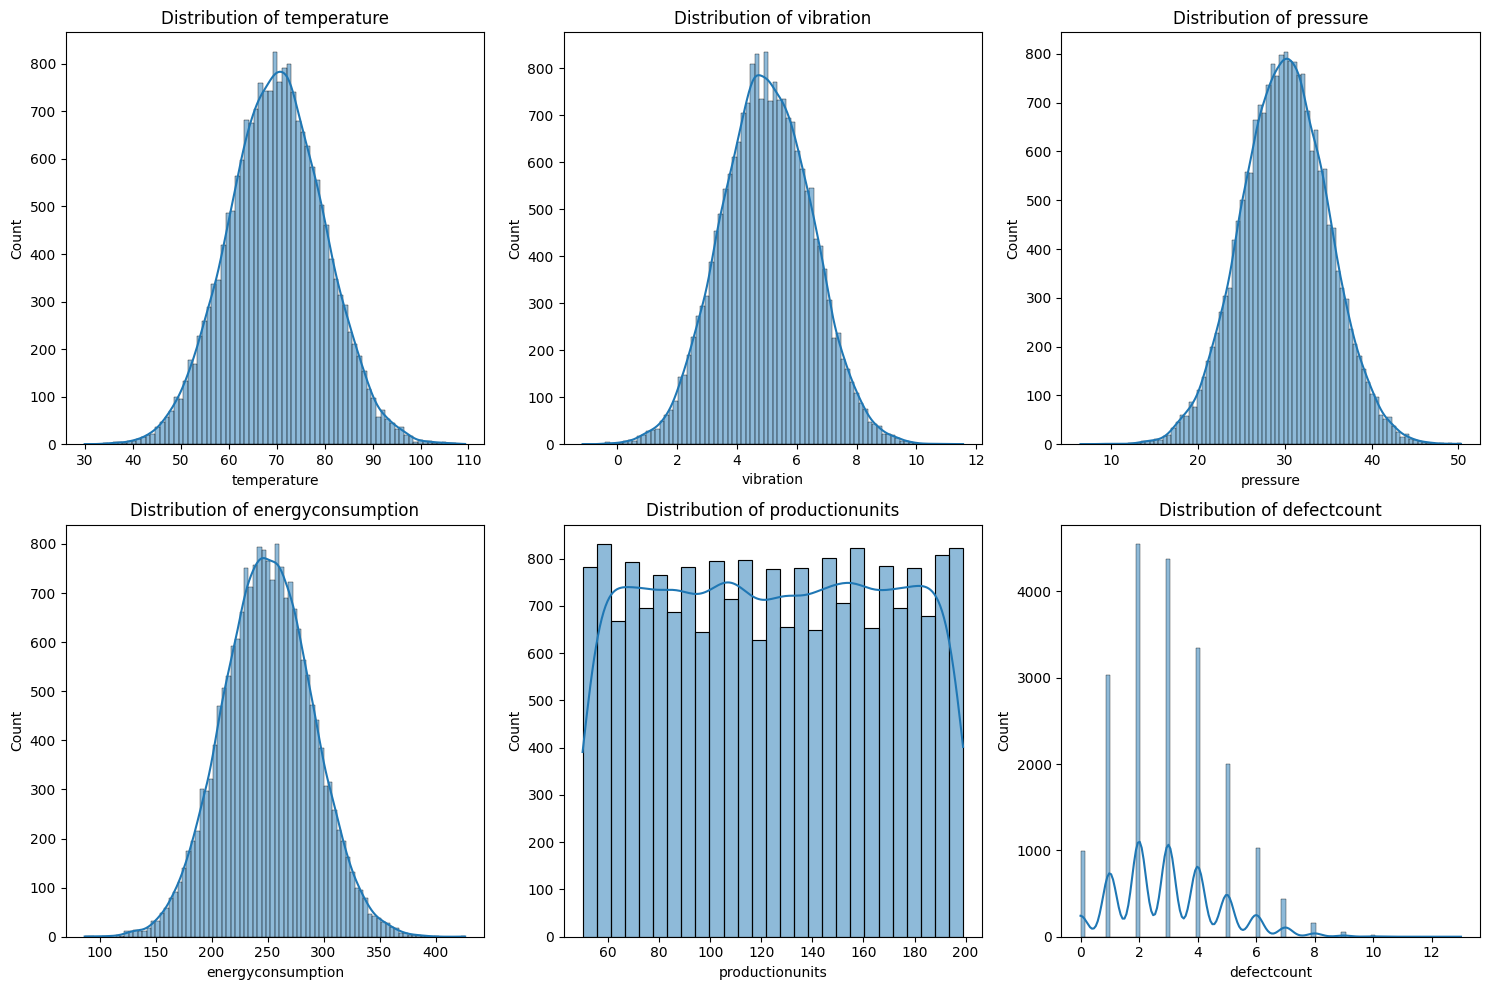

In [22]:
# Distribution of Numerical Features using histogram and Boxplot
plt.figure(figsize=(15,10))
for i,col in enumerate (num_features, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()
#  In defectcount columns zero-inflated count data & most observations have zero defects and right skewed 

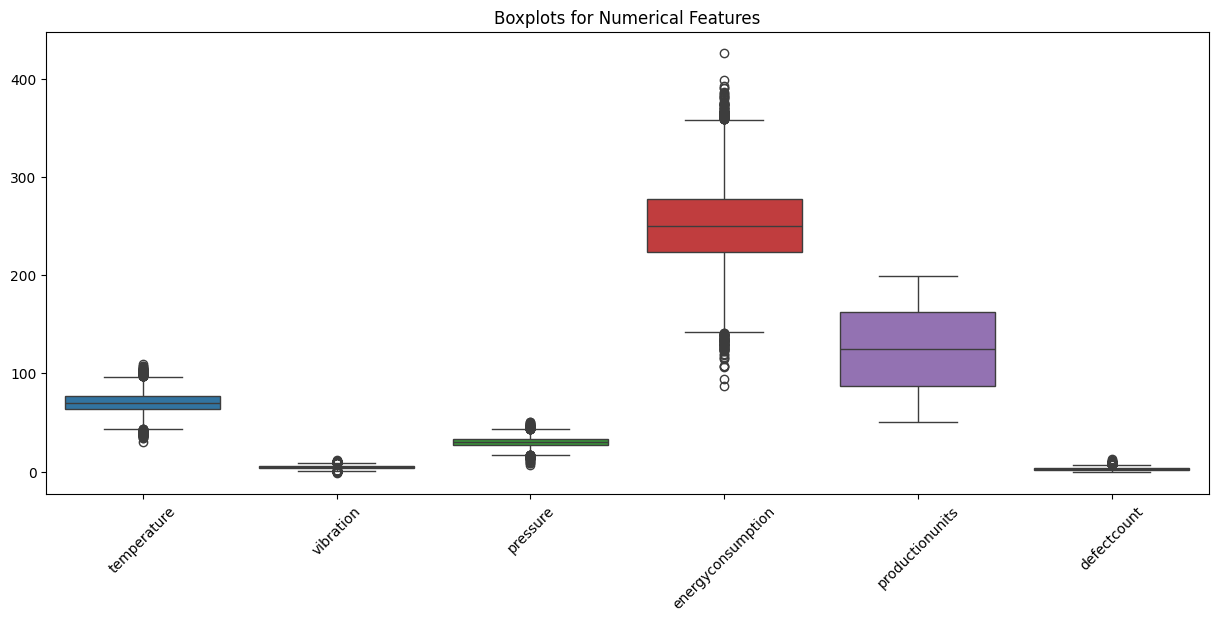

In [23]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[num_features])
plt.title('Boxplots for Numerical Features')
plt.xticks(rotation=45)
plt.show()

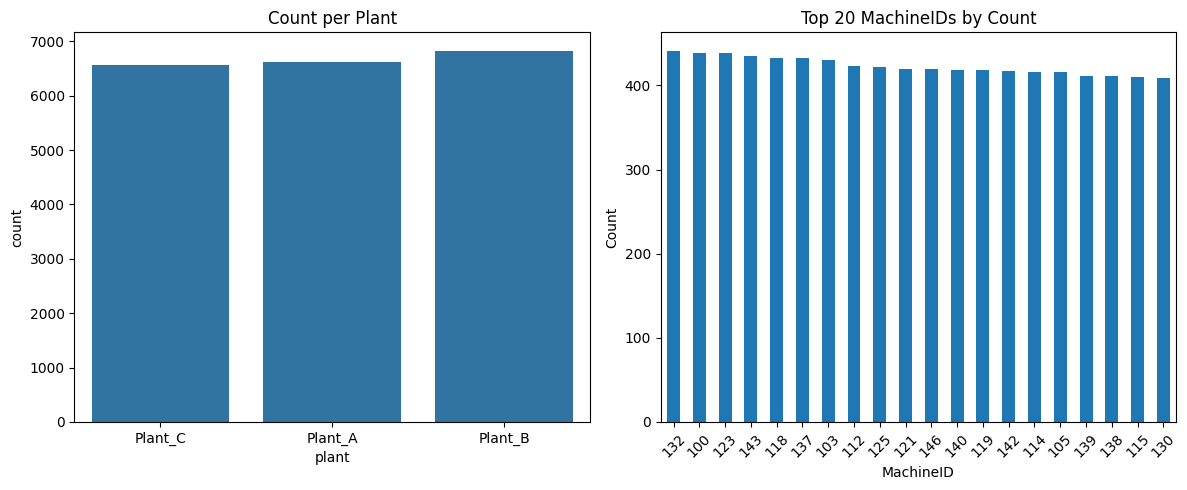

In [24]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='plant', data=df)
plt.title('Count per Plant')

plt.subplot(1, 2, 2)
df['machineid'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 MachineIDs by Count')
plt.xlabel('MachineID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

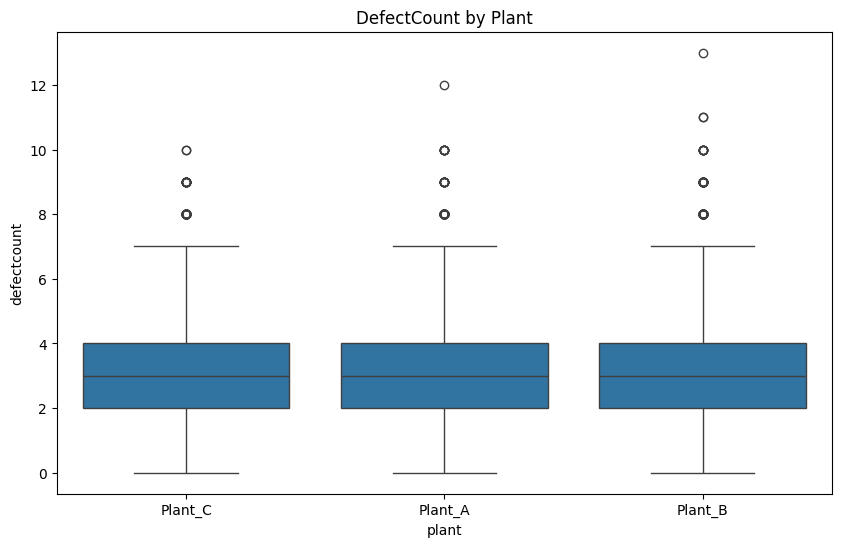

In [25]:
#Target Features vs Categorical Features
# DefectCount by Plant
plt.figure(figsize=(10, 6))
sns.boxplot(x='plant', y='defectcount', data=df)
plt.title('DefectCount by Plant')
plt.show()

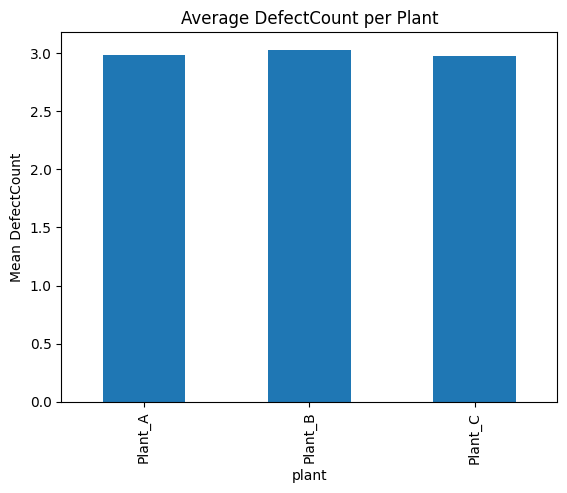

In [26]:
# Average DefectCount by Plant
df.groupby('plant')['defectcount'].mean().plot(kind='bar')
plt.title('Average DefectCount per Plant')
plt.ylabel('Mean DefectCount')
plt.show()

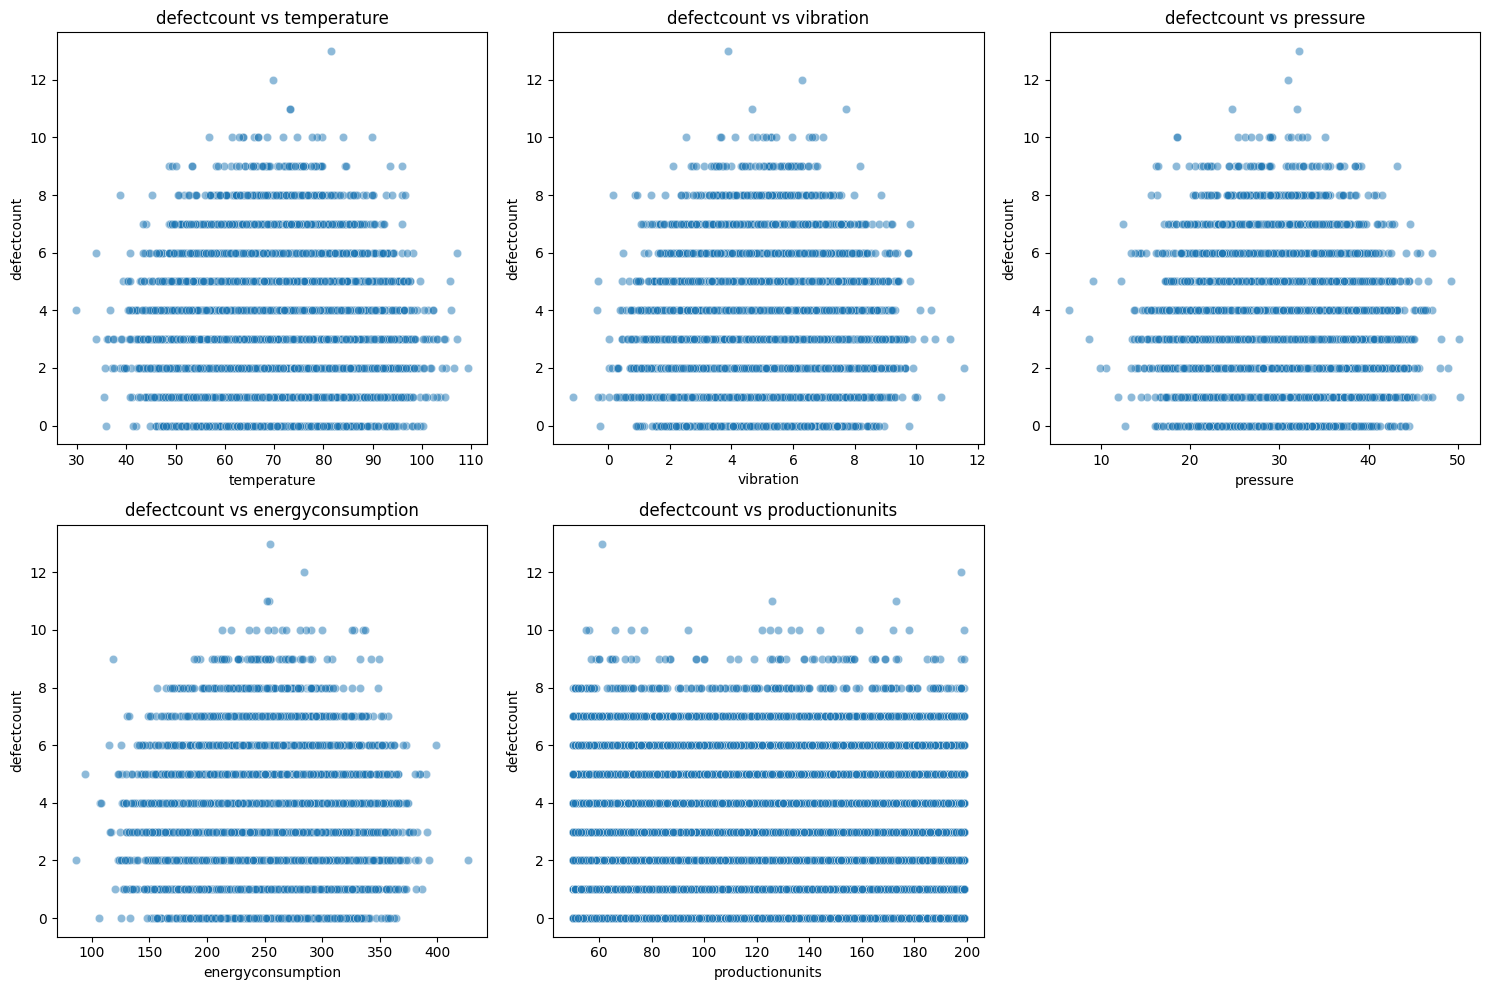

In [27]:
# Target Features vs Numerical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features[:-1], 1):  # Exclude DefectCount itself
    plt.subplot(2, 3, i)
    sns.scatterplot(x=col, y='defectcount', data=df, alpha=0.5)
    plt.title(f'defectcount vs {col}')
plt.tight_layout()
plt.show()

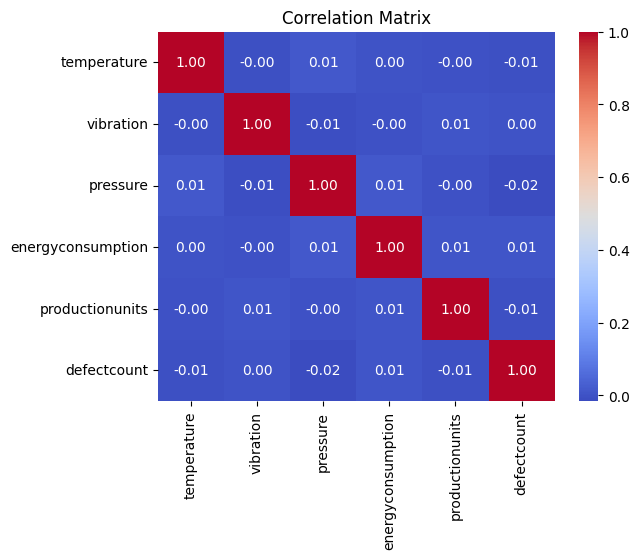

In [28]:
# Correlation heatmap
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [93]:
FEATURE ENGINEERING

SyntaxError: invalid syntax (366712570.py, line 1)

In [29]:
# 1. Efficiency ratio: Energy per unit produced 
df['energy_per_unit'] = df['energyconsumption'] / (df['productionunits'] + 1e-6)  # avoid divide by zero

# 2. Vibration × Temperature interaction 
df['vib_temp_interact'] = df['vibration'] * df['temperature']

# 3. Vibration deviation from mean 
df['vibration_dev'] = df['vibration'] - df['vibration'].mean()

# 4. Pressure × Energy interaction 
df['press_energy_interact'] = df['pressure'] * df['energyconsumption']

# 5. Plant-level averages 
plant_vib_mean = df.groupby('plant')['vibration'].mean().to_dict()
df['vib_plant_mean'] = df['plant'].map(plant_vib_mean)
df['vib_vs_plant'] = df['vibration'] - df['vib_plant_mean']


new_features = ['energy_per_unit', 'vib_temp_interact', 'vibration_dev', 'press_energy_interact', 'vib_vs_plant']
print("New features added:", new_features)
print("Sample of new features:\n", df[new_features].head())
print("Shape after feature engineering:", df.shape)

New features added: ['energy_per_unit', 'vib_temp_interact', 'vibration_dev', 'press_energy_interact', 'vib_vs_plant']
Sample of new features:
    energy_per_unit  vib_temp_interact  vibration_dev  press_energy_interact  \
0         1.914007         274.505206      -1.057499            7567.336337   
1         1.659042         337.160064      -0.104051            8705.940157   
2         2.308494         438.739767       0.403933            6169.959876   
3         2.313505         239.383749      -2.236052           10052.959699   
4         1.128608         519.030143       1.598589            5301.828562   

   vib_vs_plant  
0     -1.037145  
1     -0.083697  
2      0.424286  
3     -2.240211  
4      1.583052  
Shape after feature engineering: (20000, 16)


DATA PREPROCESSING

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [55]:
# Preprocessing for numerical: impute missing (median) + optional scale
num_transformer = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())  # optional but helps some models
])

# Preprocessing for categorical: impute 'missing' (for Plant/MachineID)
cat_transformer = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
])

# Full preprocessor – no encoding yet (handled later for high-cardinality)
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features),
], remainder='drop')

print("Preprocessing pipeline created.")

Preprocessing pipeline created.


In [56]:
!pip install category_encoders 


In [57]:
import sys
!{sys.executable} -m pip install category_encoders


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
from category_encoders import TargetEncoder


In [59]:


# Target encode MachineID (since high cardinality from EDA)
encoder = TargetEncoder(cols=['machineid'], smoothing=10.0)  # smoothing avoids overfitting

# Fit on full data before split (common for EDA phase – use train only for production)
df['machineid_encoded'] = encoder.fit_transform(df['machineid'], df['defectcount'])['machineid']

# Update cat_features: replace machineid with encoded version (now numerical)
num_features.append('machineid_encoded')
cat_features.remove('machineid') if 'machineid' in cat_features else None

print("MachineID encoded. Sample:")
print(df[['machineid', 'machineid_encoded', 'defectcount']].head(10))

MachineID encoded. Sample:
   machineid  machineid_encoded  defectcount
0        137           3.104167            2
1        143           2.898851            2
2        112           3.016548            4
3        108           3.113695            2
4        109           3.018325            5
5        111           2.973039            1
6        105           2.968750            5
7        115           2.958537            1
8        100           3.150342            0
9        116           2.910811            4


TRAIN TEST SPLIT

In [60]:
# Final features for modeling (original + engineered + encoded)
from sklearn.model_selection import train_test_split
final_features = num_features + cat_features

X = df[final_features].copy()
y = df['defectcount'].copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.15, 
    random_state=42
)

print("Final features:", final_features)
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)

Final features: ['temperature', 'vibration', 'pressure', 'energyconsumption', 'productionunits', 'energy_per_unit', 'vib_temp_interact', 'vibration_dev', 'press_energy_interact', 'vib_vs_plant', 'machineid_encoded', 'plant']
X_train shape: (17000, 12)
X_test shape : (3000, 12)


In [61]:
# Fit preprocessor on train, transform train/test
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

print("Preprocessing applied.")
print("X_train_prep shape:", X_train_prep.shape)

Preprocessing applied.
X_train_prep shape: (17000, 12)


In [65]:
num_features = ['temperature', 'vibration', 'pressure', 'energyconsumption', 'productionunits', 
                'energy_per_unit', 'vib_temp_interact', 'vibration_dev', 'press_energy_interact', 'vib_vs_plant']

cat_features = ['plant']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('impute', SimpleImputer(strategy='median')),
            ('scale', StandardScaler())
        ]), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features),
        # machineid_encoded is numerical → pass through
    ],
    remainder='passthrough'  # keep machineid_encoded
)

In [62]:
import sys
!{sys.executable} -m pip install xgboost


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


XGBOOST MODEL

In [63]:
from xgboost import XGBRegressor
from xgboost.callback import EarlyStopping

In [51]:
# Uninstall old XGBoost first (clean slate)
!pip uninstall xgboost -y

# Install the latest version
!pip install xgboost --upgrade



Found existing installation: xgboost 2.1.4
Uninstalling xgboost-2.1.4:
  Successfully uninstalled xgboost-2.1.4
  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-win_amd64.whl (124.9 MB)


In [52]:
import xgboost
print("XGBoost version after upgrade:", xgboost.__version__)  # should be 2.x or 1.7+

XGBoost version after upgrade: 3.2.0


In [66]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        objective='reg:squarederror',  # default for regression; use 'count:poisson' if you want Poisson
        verbosity=0
    ))
])

In [67]:
model.fit(X_train, y_train)

c:\Users\sahan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['temperature', 'vibration',
                                                   'pressure',
                                                   'energyconsumption',
                                                   'productionunits',
                                                   'energy_per_unit',
                                                   'vib_temp_interact',
                                                   'vibration_dev',
                                                   'press_energy_interact',
                                                   'vib_vs_plan...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [80]:

from sklearn.metrics import mean_absolute_error, mean_squared_error


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n" + "="*50)
print("XGBOOST REGRESSION RESULTS")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print("="*50)


XGBOOST REGRESSION RESULTS
MAE : 1.3687
RMSE: 1.7491


RIDGE REGRESSION

In [71]:
from sklearn.linear_model import Ridge

ridge_model = Pipeline([
    ('preprocessor', preprocessor),           # your existing preprocessor
    ('regressor', Ridge(
        alpha=1.0,                            # regularization strength
        random_state=42
    ))
])

In [72]:
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temperature', 'vibration',
                                                   'pressure',
                                                   'energyconsumption',
                                                   'productionunits']),
                                                 ('cat_plant',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['plant']),
                                                 ('cat_machineid',
                                                  'passthrough',
                                                  ['machineid'])])),
                ('regressor', Ridge(random_state=42))])

In [73]:
y_pred = ridge_model.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n" + "="*50)
print("RIDGE REGRESSION RESULTS")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print("="*50)


RIDGE REGRESSION RESULTS
MAE : 1.3687
RMSE: 1.7491


DECISION TREE 

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
dt_model = Pipeline([
    ('preprocessor', preprocessor),           # your existing preprocessor
    ('regressor', DecisionTreeRegressor(
        max_depth=8,                           # control overfitting – tune this
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    ))
])

In [77]:
dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temperature', 'vibration',
                                                   'pressure',
                                                   'energyconsumption',
                                                   'productionunits']),
                                                 ('cat_plant',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['plant']),
                                                 ('cat_machineid',
                                                  'passthrough',
                                                  ['machineid'])])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=8, min_samples_leaf=5,
                                       min_samples_split=10,
                                       random_state=42))])

In [79]:
y_pred = dt_model.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n" + "="*50)
print("DECISION TREE REGRESSION RESULTS")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print("="*50)


DECISION TREE REGRESSION RESULTS
MAE : 1.3868
RMSE: 1.7613
